In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

Sistema de Categorización de Dolores del Cliente
Resumen del Análisis

Total de puntos de dolor analizados: 512
Fuente: 100 reuniones con clientes
Metodología: Análisis de frecuencia de palabras clave y agrupación temática


Categorías Principales de Dolores del Cliente
1. Costos Financieros (99 menciones)
Número de categoría: 01
Problemas relacionados con altos costos operativos y financieros:

Altos costos por GMF (Gravamen a los Movimientos Financieros)
Comisiones bancarias elevadas
Costos de transferencias internacionales
Tarifas ocultas en transacciones
Costos de cambio de divisas

2. Pagos Internacionales (89 menciones)
Número de categoría: 02
Dificultades en operaciones financieras transfronterizas:

Transferencias SWIFT lentas y costosas
Falta de entidades empresariales en países extranjeros
Gestión de múltiples monedas (USD, yuanes, pesos)
Pagos a proveedores internacionales
Recepción de pagos del extranjero

3. Procesos Manuales (75 menciones)
Número de categoría: 03
Ineficiencias por falta de automatización:

Subida manual de archivos planos
Procesos no automatizados
Gestión manual de pagos
Falta de integración entre sistemas
Repetición de tareas administrativas

4. Gestión de Usuarios/Clientes (72 menciones)
Número de categoría: 04
Dificultades en la administración de clientes y usuarios:

Gestión de múltiples clientes en una plataforma
Identificación de pagos por cliente
Portal de usuarios complejo
Falta de herramientas de administración
Seguimiento individualizado

5. Múltiples Entidades (70 menciones)
Número de categoría: 05
Complejidad por manejo de varias entidades empresariales:

Gestión de múltiples NITs
Operación en diferentes portales bancarios
Dispersión entre múltiples cuentas
Consolidación de información
Gestión centralizada vs descentralizada

6. Limitaciones de Horarios (64 menciones)
Número de categoría: 06
Restricciones temporales en operaciones financieras:

Dependencia de horarios bancarios
Limitaciones de días hábiles
Falta de flexibilidad temporal
Restricciones de disponibilidad 24/7
Demoras por horarios comerciales

7. Tecnología e Integración (46 menciones)
Número de categoría: 07
Problemas tecnológicos y de conectividad:

Falta de APIs para integración
Plataformas no conectadas
Problemas de interfaz
Incompatibilidad de sistemas
Necesidad de soluciones tecnológicas avanzadas

8. Seguridad y Compliance (44 menciones)
Número de categoría: 08
Preocupaciones por seguridad y cumplimiento normativo:

Gestión de tokens de seguridad
Riesgos en operaciones financieras
Cumplimiento regulatorio
Políticas de compliance
Protección de datos financieros

9. Liquidez y Flujo de Caja (36 menciones)
Número de categoría: 09
Problemas relacionados con la gestión financiera:

Gestión de tesorería compleja
Problemas de cash flow
Optimización de capital de trabajo
Administración de fondos
Planificación financiera

10. Soporte y Servicio al Cliente (21 menciones)
Número de categoría: 10
Deficiencias en atención y soporte:

Falta de soporte técnico adecuado
Tiempos de respuesta lentos
Calidad de atención al cliente
Disponibilidad de ayuda
Canales de comunicación limitados

11. Documentación y Reportes (9 menciones)
Número de categoría: 11
Problemas con documentación y generación de reportes:

Comprobantes de pago
Facturación automática
Reportes financieros
Documentación para escrituración
Trazabilidad documental

12. Experiencia de Usuario (9 menciones)
Número de categoría: 12
Problemas de usabilidad y experiencia:

Interfaces complejas
Dificultad de uso
Curva de aprendizaje alta
Navegación poco intuitiva
Diseño no user-friendly

13. Conciliación y Seguimiento (7 menciones)
Número de categoría: 13
Dificultades en reconciliación y tracking:

Conciliación de pagos
Seguimiento de transacciones
Trazabilidad de operaciones
Identificación de pagos
Rastreo de movimientos

14. Otros (115 menciones)
Número de categoría: 99
Problemas específicos que no encajan en las categorías anteriores:

Problemas de suscripciones
Asistencia a conferencias
Casos particulares por industria
Necesidades muy específicas del negocio

# modelo de clasificacion

# analitycs Proposal

In [4]:
import pandas as pd
import json
import re
from typing import List, Dict, Any, Union
from openai import OpenAI
import os


In [5]:
df=pd.read_csv('file.csv')
df['Nombre'] = df['Nombre'].str.lower()
df = df[df['Nombre'].notna() & df['Nombre'].str.contains('intro')]
df = df.reset_index(drop=True)
df.head()

,Id Reunión,Nombre,Tipo de conversación,Invitados,Fecha de agendado,Fecha de inicio,Duración,Estado deal,Nombre de participante,Rol de participante,...,Bancos que usan,Tecnologías que Usa el Cliente,Numero de pagos,Productos de Interés Potenciales,Sugerencias,Fortalezas,Desempeño,Desempeño (hint),Technologies Used by the Client,Number of Payments
0,0180570a-3bc7-11f0-b4b7-06254876e271,intro - cartama / cobre,Venta:Discovery,"paulam@cobre.co, sebastianor@cobre.co, pcastro...",2025-06-12T13:00:00Z,2025-06-12T12:58:41Z,1786.0,open,Katherine Hernandez Baena,Cliente,...,"BBVA, Davivienda, Bancolombia, Banco de Bogot\...",ERP,No hay informaci\u00F3n.\n,"pagos locales, connect, pagos internacionales ...",NaN,NaN,NaN,NaN,NaN,NaN
1,02debf4c-4abd-11f0-b422-06254876e271,intro reuni\u00f3n con cobre <> yan cohete,Venta:Discovery,"alejandroh@cobre.co, wjy@yuanheng.mx",2025-06-24T21:30:00Z,2025-06-24T21:30:04Z,1380.0,open,Alejandro Henao,Vendedor,...,"Bancomer, STP, ASP STP","Radian, MC, Mu",No hay informaci\u00F3n.\n,"Pagos en d\u00F3lares, Pagos en yuanes, Recaud...","Hola Alejandro, \u00A1excelente manejo de la c...",\u00A1Hola Alejandro! Aqu\u00ED te dejo alguna...,8.0,"Hola Alejandro, tu desempe\u00F1o es bastante ...",NaN,NaN
2,037ceeba-4081-11f0-975c-06254876e271,intro-trytoku/cobre,Venta:Discovery,"karolv@cobre.co, max@trytoku.com, arodriguez@t...",2025-06-04T17:00:00Z,2025-06-04T17:01:55Z,1609.0,open,Karol Julieth Veloza Arevalo,Vendedor,...,Santander,"ERP, CRM",No hay informaci\u00F3n.\n,NaN,"\u00A1Karol, excelente manejo de la conversaci...",- **Excelente capacidad de entendimiento:** Id...,7.0,"Hola Karol, tu inicio fue bueno al presentarte...",NaN,NaN
3,04796458-35c6-11f0-97e3-06254876e271,intro: hablemos de cobre/let's talk about cobr...,Venta:Discovery,"camilak@cobre.co, maryanne.caramia@rail.io",2025-05-22T17:30:00Z,2025-05-22T17:32:30Z,1108.0,open,Camila Kempff Seleme,Vendedor,...,NaN,NaN,No hay informaci\u00F3n.\n,"US bank accounts, Pesos payouts, Same day sett...",- **Profundizar en las necesidades del cliente...,"Hola Camila, \u00A1un gusto saludarte! Aqu\u00...",7.0,\u00A1Hola Camila! Tu llamada tuvo puntos fuer...,NaN,NaN
4,06346cfa-5049-11f0-b9cf-06254876e271,intro para clientes blockchain.com,Venta:Discovery,"alejandroh@cobre.co, omar@cobre.co, vruiz@bloc...",2025-06-24T20:15:00Z,2025-06-24T20:16:02Z,1712.0,open,Valentino Ruiz,Cliente,...,NaN,Blockchain.com,No hay informaci\u00F3n.\n,"COP a USDT, Soluciones de pago, Pains, Pagos, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd
import json
import re
from typing import List, Dict, Any, Union
from openai import OpenAI
import os

class SalesDataProcessor:
    def __init__(self, api_key: str = None):
        """
        Inicializa el procesador de datos de ventas con LLM

        Args:
            api_key: Clave de API de OpenAI (si no se proporciona, se busca en variables de entorno)
        """
        self.client = OpenAI(api_key=api_key or os.getenv('OPENAI_API_KEY'))

        # Mapeo de categorías de pain points
        self.pain_points_categories = {
            "01": "Costos Financieros",
            "02": "Pagos Internacionales",
            "03": "Procesos Manuales",
            "04": "Gestión de Usuarios/Clientes",
            "05": "Múltiples Entidades",
            "06": "Limitaciones de Horarios",
            "07": "Tecnología e Integración",
            "08": "Seguridad y Compliance",
            "09": "Liquidez y Flujo de Caja",
            "10": "Soporte y Servicio al Cliente",
            "11": "Documentación y Reportes",
            "12": "Experiencia de Usuario",
            "13": "Conciliación y Seguimiento",
            "99": "Otros"
        }


    def create_prompt(self, row_data: Dict, categories: Dict) -> str:
        """
        Crea el prompt para el LLM basado en los datos de la fila
        """
        categories_text = "\n".join([f"- {code}: {name}" for code, name in categories.items()])
        prompt = f"""
          Eres un experto en análisis de datos de ventas. Tu tarea es extraer y estructurar información de datos de clientes potenciales.

          CATEGORÍAS DE PAIN POINTS DISPONIBLES:
          {categories_text}

          DATOS DEL CLIENTE:
          {json.dumps(row_data, indent=2, ensure_ascii=False)}

          INSTRUCCIONES:
          1. Extrae el nombre del cliente/empresa
          2. Analiza el sentimiento (Muy Positivo, Positivo, Neutral, Negativo, Muy Negativo)
          3. Identifica los pain points y mapéalos a los códigos de categoría correspondientes (01-13, 99)
          4. Según los puntos de dolor (pain points) retorna 2 sugerencias al asesor separadas por comas.
          5. Identifica objeciones principales
          6. Encuentra el tomador de decisión
          7. Determina predicción de éxito (1-5)
          8. Lista bancos actuales
          9. Identifica tecnologías usadas
          10. Lista productos de interés
          11. Evalúa desempeño (1-10)
          12. Determina la industria

          FORMATO DE RESPUESTA (JSON):
          {{
              "cliente": "nombre_empresa",
              "sentimiento": "sentimiento_evaluado",
              "pain_points": ["código1", "código2"],
              "tiempo_decision": "tiempo_extraído_o_No_definido",
              "sugerencias":"texto1,texto2",
              "objeciones": "objeciones_principales_o_Ninguna",
              "tomador_decision": "nombre_persona",
              "prediccion_exito": número_1_a_5,
              "bancos_actuales": ["banco1", "banco2"],
              "tecnologias": ["tech1", "tech2"],
              "productos_interes": ["producto1", "producto2"],
              "desempeno": número_1_a_10,
              "industria": "sector_industrial"

          }}

          Responde ÚNICAMENTE con el JSON válido, sin texto adicional.
          """
        return prompt

    def process_with_llm(self, prompt: str) -> Dict[str, Any]:
        """
        Procesa los datos usando el LLM
        """
        try:
            response = self.client.chat.completions.create(
                model="gpt-4o-mini",
                messages=[
                    {"role": "system", "content": "Eres un experto analista de datos de ventas. Responde únicamente con JSON válido."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0.1,
                max_tokens=1000
            )

            content = response.choices[0].message.content.strip()

            # Limpiar respuesta si contiene texto adicional
            if content.startswith('```json'):
                content = content[7:]
            if content.endswith('```'):
                content = content[:-3]

            return json.loads(content)

        except json.JSONDecodeError as e:
            print(f"Error decodificando JSON: {e}")
            print(f"Respuesta del LLM: {content}")
            return self._create_default_structure()
        except Exception as e:
            print(f"Error en procesamiento LLM: {e}")
            return self._create_default_structure()

    def _create_default_structure(self) -> Dict[str, Any]:
        """
        Crea estructura por defecto en caso de error
        """
        return {
            "cliente": "Sin identificar",
            "sentimiento": "Neutral",
            "pain_points": ["99"],
            "tiempo_decision": "No definido",
            "objeciones": "Ninguna",
            "tomador_decision": "Sin identificar",
            "prediccion_exito": 3,
            "bancos_actuales": [],
            "tecnologias": [],
            "productos_interes": [],
            "desempeno": 5,
            "industria": "Sin clasificar"
        }

    def validate_and_clean_data(self, data: Dict[str, Any]) -> Dict[str, Any]:
        """
        Valida y limpia los datos procesados
        """
        # Validar pain_points
        valid_codes = list(self.pain_points_categories.keys())
        data['pain_points'] = [code for code in data.get('pain_points', []) if code in valid_codes]
        if not data['pain_points']:
            data['pain_points'] = ['99']

        # Validar prediccion_exito
        try:
            data['prediccion_exito'] = max(1, min(5, int(data.get('prediccion_exito', 3))))
        except:
            data['prediccion_exito'] = 3

        # Validar desempeno
        try:
            data['desempeno'] = max(1, min(10, int(data.get('desempeno', 5))))
        except:
            data['desempeno'] = 5

        # Asegurar que las listas sean listas
        list_fields = ['bancos_actuales', 'tecnologias', 'productos_interes']
        for field in list_fields:
            if not isinstance(data.get(field), list):
                data[field] = []

        return data

    def load_sales_data(self, df) -> List[Dict[str, Any]]:
        """
        Función principal que procesa el archivo y retorna datos estructurados

        Args:
            file_path: Ruta del archivo CSV o TXT

        Returns:
            Lista de diccionarios con datos estructurados de ventas
        """

        sales_data = []
        total_rows = len(df)

        print(f"Procesando {total_rows} registros...")

        for index, row in df.iterrows():
            print(f"Procesando registro {index + 1}/{total_rows}")

            # Convertir fila a diccionario
            row_data = row.to_dict()

            # Crear prompt
            prompt = self.create_prompt(row_data, self.pain_points_categories)

            # Procesar con LLM
            processed_data = self.process_with_llm(prompt)

            # Validar y limpiar
            clean_data = self.validate_and_clean_data(processed_data)

            sales_data.append(clean_data)
            if index==10:
              break

        print(f"Procesamiento completado. {len(sales_data)} registros procesados.")
        return sales_data

# Función de conveniencia para uso directo
def load_sales_data(df: pd.DataFrame, api_key: str = None) -> List[Dict[str, Any]]:
    """
    Función de conveniencia para cargar y procesar datos de ventas

    Args:
        file_path: Ruta del archivo CSV o TXT
        api_key: Clave de API de OpenAI (opcional)

    Returns:
        Lista de diccionarios con datos estructurados
    """
    processor = SalesDataProcessor(api_key=api_key)
    return processor.load_sales_data(df=df)


# Ejemplo de uso principal
if __name__ == "__main__":
    print("=== Ejemplo de procesamiento de datos de ventas con LLM ===\n")

    # Configurar API key
    os.environ['OPENAI_API_KEY'] = 'KEY'

    try:
        print("2. Para procesar tu archivo CSV/TXT:")
        sales_data = load_sales_data(df)
        print(sales_data)

        print("\n" + "="*50 + "\n")


        # Guardar resultados
        with open('processed_sales_data.json', 'w', encoding='utf-8') as f:
              json.dump(sales_data, f, indent=2, ensure_ascii=False)
        print(f"\nDatos guardados en 'processed_sales_data.json'")

    except Exception as e:
        print(f"Error: {e}")
        print("\nAsegúrate de:")
        print("1. Tener tu API key de OpenAI configurada")
        print("2. Instalar las dependencias: pip install openai pandas")
        print("3. Tener el archivo de datos en el formato correcto")

=== Ejemplo de procesamiento de datos de ventas con LLM ===

2. Para procesar tu archivo CSV/TXT:
Procesando 100 registros...
Procesando registro 1/100
Procesando registro 2/100
Procesando registro 3/100
Procesando registro 4/100
Procesando registro 5/100
Procesando registro 6/100
Procesando registro 7/100
Procesando registro 8/100
Procesando registro 9/100
Procesando registro 10/100
Procesando registro 11/100
Procesamiento completado. 11 registros procesados.
[{'cliente': 'Cartama', 'sentimiento': 'Positivo', 'pain_points': ['05', '02', '03', '06', '08', '11'], 'tiempo_decision': 'No se explicita un tiempo definido para la toma de decisión.', 'sugerencias': 'Ofrecer una solución que centralice las operaciones financieras, Proporcionar opciones de seguridad mejoradas para las transacciones.', 'objeciones': 'Ninguna', 'tomador_decision': 'Patricia', 'prediccion_exito': 4, 'bancos_actuales': ['BBVA', 'Davivienda', 'Bancolombia', 'Banco de Bogotá'], 'tecnologias': ['ERP'], 'productos_inte

🚀 ANÁLISIS COMPLETO DE VENTAS PARA ATRACCIÓN DE CLIENTES
🎯 ANÁLISIS DE PATRONES DE PAIN POINTS
📊 Pain Points más frecuentes:


/tmp/ipython-input-7-3109949171.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


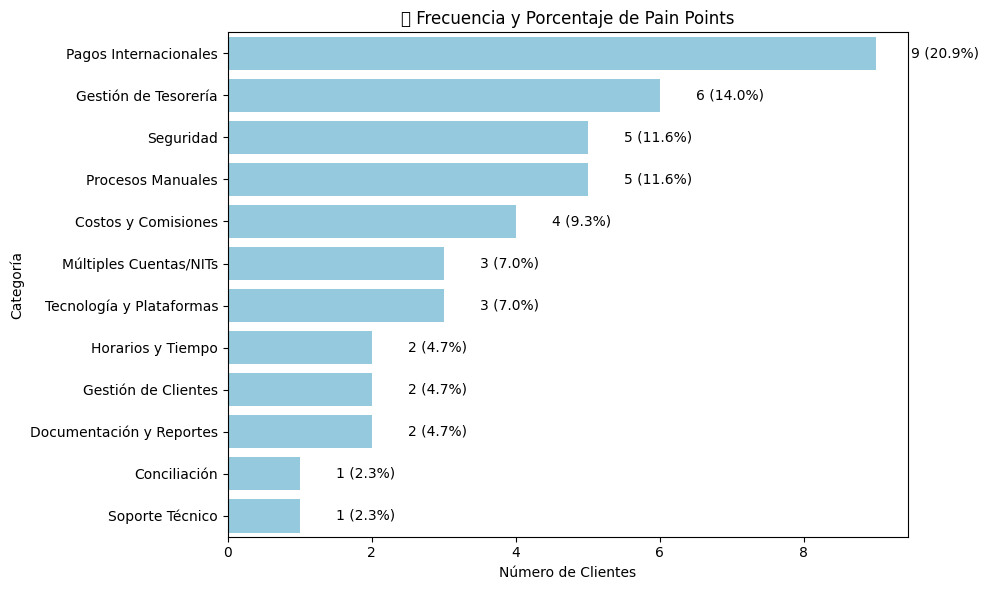


📋 RESUMEN INTERPRETATIVO POR CATEGORÍA:

🔹 Pagos Internacionales (9 menciones, 20.9%):
   Dificultades en operaciones transfronterizas: transferencias SWIFT, monedas múltiples, pagos y recepción del extranjero.

🔹 Gestión de Tesorería (6 menciones, 14.0%):
   Problemas en flujo de caja y tesorería: planificación financiera, capital de trabajo, administración de fondos.

🔹 Seguridad (5 menciones, 11.6%):
   Riesgos y preocupaciones por cumplimiento normativo y seguridad de operaciones financieras.

🔹 Procesos Manuales (5 menciones, 11.6%):
   Ineficiencias por falta de automatización: carga manual de archivos, tareas repetitivas, falta de integración.

🔹 Costos y Comisiones (4 menciones, 9.3%):
   Problemas relacionados con altos costos operativos y financieros: GMF, comisiones, transferencias, tarifas y cambio de divisas.

🔹 Múltiples Cuentas/NITs (3 menciones, 7.0%):
   Complejidad en manejo de múltiples entidades y NITs, dispersión entre cuentas y sistemas bancarios.

🔹 Tecnología y

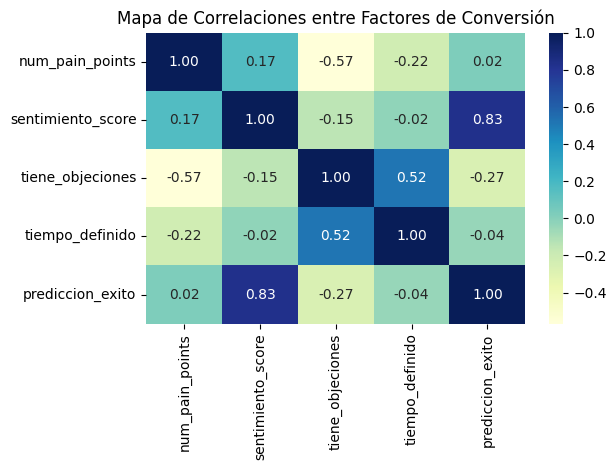


🎯 LEAD SCORING PREDICTIVO
🔢 Sistema de Scoring (0-100 puntos):

   Cartama: 50 puntos
      Detalles: Pain Points (+10), Sentimiento (+25), Sin objeciones (+15)
      Predicción actual: 4/5
      ⚡ Recomendación: Prioridad MEDIA - Seguimiento activo

   Cobre: 65 puntos
      Detalles: Pain Points (+20), Sentimiento (+25), Urgencia (+20)
      Predicción actual: 4/5
      🚀 Recomendación: Prioridad ALTA - Contacto inmediato

   Toku: 20 puntos
      Detalles: Pain Points (+20)
      Predicción actual: 2/5
      📋 Recomendación: Priodidad BAJA - Educar sobre propuesta de Valor COBRE

   Cobre: 45 puntos
      Detalles: Pain Points (+20), Sentimiento (+25)
      Predicción actual: 4/5
      ⚡ Recomendación: Prioridad MEDIA - Seguimiento activo

   Blockchain.com: 45 puntos
      Detalles: Pain Points (+20), Sentimiento (+25)
      Predicción actual: 4/5
      ⚡ Recomendación: Prioridad MEDIA - Seguimiento activo

   Alejandro Eleganza Shop: 35 puntos
      Detalles: Pain Points (+10), S

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

class SalesAnalyzer:
    def __init__(self):
        """Analizador avanzado de datos de ventas para optimizar atracción de clientes"""
        self.data = None
        self.pain_point_categories = {
            '01': 'Costos y Comisiones',
            '02': 'Pagos Internacionales',
            '03': 'Procesos Manuales',
            '04': 'Gestión de Clientes',
            '05': 'Múltiples Cuentas/NITs',
            '06': 'Horarios y Tiempo',
            '07': 'Tecnología y Plataformas',
            '08': 'Seguridad',
            '09': 'Gestión de Tesorería',
            '10': 'Soporte Técnico',
            '11': 'Documentación y Reportes',
            '12': 'Usabilidad (UX/UI)',
            '13': 'Conciliación',
            '99': 'Específico del Sector'
        }

    def load_sales_data(self):
        """Carga los datos de ventas desde un diccionario"""
        self.data = pd.read_json('processed_sales_data.json')
        return self.data


    def analyze_pain_point_patterns(self):
        """Analiza patrones de pain points para segmentación"""
        print("🎯 ANÁLISIS DE PATRONES DE PAIN POINTS")
        print("=" * 50)
        print("📊 Pain Points más frecuentes:")

        # Contar frecuencia
        all_pain_points = [p for sublist in self.data['pain_points'] for p in sublist]
        pain_freq = Counter(all_pain_points)
        total = sum(pain_freq.values())

        # Crear DataFrame
        df_pain = pd.DataFrame({
            'Código': list(pain_freq.keys()),
            'Pain Point': [self.pain_point_categories.get(k, k) for k in pain_freq.keys()],
            'Frecuencia': list(pain_freq.values())
        })
        df_pain['Porcentaje'] = df_pain['Frecuencia'] / total * 100
        df_pain = df_pain.sort_values(by='Frecuencia', ascending=False)

        # Graficar
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df_pain, x='Frecuencia', y='Pain Point', color='skyblue')
        plt.title('📊 Frecuencia y Porcentaje de Pain Points')
        plt.xlabel('Número de Clientes')
        plt.ylabel('Categoría')

        # Añadir etiquetas personalizadas
        for bar, freq, pct in zip(ax.patches, df_pain['Frecuencia'], df_pain['Porcentaje']):
            ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f"{freq} ({pct:.1f}%)", va='center')

        plt.tight_layout()
        plt.show()

        # ------------------------------------
        # Imprimir resumen interpretativo
        # ------------------------------------
        resumen = {
            '01': 'Problemas relacionados con altos costos operativos y financieros: GMF, comisiones, transferencias, tarifas y cambio de divisas.',
            '02': 'Dificultades en operaciones transfronterizas: transferencias SWIFT, monedas múltiples, pagos y recepción del extranjero.',
            '03': 'Ineficiencias por falta de automatización: carga manual de archivos, tareas repetitivas, falta de integración.',
            '04': 'Problemas en la gestión de clientes y usuarios: múltiples cuentas, portal complejo, seguimiento individualizado.',
            '05': 'Complejidad en manejo de múltiples entidades y NITs, dispersión entre cuentas y sistemas bancarios.',
            '06': 'Restricciones operativas por horarios y días hábiles: falta de disponibilidad 24/7.',
            '07': 'Limitaciones tecnológicas: falta de APIs, plataformas desconectadas, interfaces no compatibles.',
            '08': 'Riesgos y preocupaciones por cumplimiento normativo y seguridad de operaciones financieras.',
            '09': 'Problemas en flujo de caja y tesorería: planificación financiera, capital de trabajo, administración de fondos.',
            '10': 'Falta de soporte técnico: atención lenta, baja disponibilidad, canales limitados.',
            '11': 'Dificultades con facturación, reportes y trazabilidad documental.',
            '12': 'Problemas de usabilidad: diseño poco intuitivo, curva de aprendizaje alta.',
            '13': 'Fallas en conciliación y rastreo de pagos y operaciones financieras.',
            '99': 'Problemas específicos del sector o muy particulares del negocio.'
        }

        print("\n📋 RESUMEN INTERPRETATIVO POR CATEGORÍA:\n")
        for _, row in df_pain.iterrows():
            codigo = row['Código']
            nombre = row['Pain Point']
            freq = row['Frecuencia']
            pct = row['Porcentaje']
            texto = resumen.get(codigo, 'Descripción no disponible.')
            print(f"🔹 {nombre} ({freq} menciones, {pct:.1f}%):\n   {texto}\n")

        # Combinaciones de pain points
        print("\n🔗 Combinaciones de Pain Points:")
        combinations = defaultdict(list)
        for idx, row in self.data.iterrows():
            combo = '-'.join(sorted(row['pain_points']))
            combinations[combo].append(row['cliente'])

        for combo, clients in combinations.items():
            pain_names = [self.pain_point_categories[p] for p in combo.split('-')]
            print(f"   {combo}: {', '.join(clients)}")
            print(f"      Categorías: {', '.join(pain_names[:3])}{'...' if len(pain_names) > 3 else ''}")

        return combinations


    def segment_customers_by_pain_points(self):
        """Segmenta clientes basado en pain points dominantes"""
        print("\n🎯 SUGERENCIAS")
        print("=" * 50)

        for idx, row in self.data.iterrows():
            sugerencias = row['sugerencias']
            cliente = row['cliente']
            print(cliente+": "+sugerencias)


    def analyze_conversion_factors(self):
        """Analiza factores que influyen en la conversión"""
        print("\n📈 ANÁLISIS DE FACTORES DE CONVERSIÓN")
        print("=" * 50)

        # Correlación entre variables y éxito
        success_factors = []

        for idx, row in self.data.iterrows():
            factor = {
                'cliente': row['cliente'],
                'num_pain_points': len(row['pain_points']),
                'sentimiento_score': {'Muy Positivo': 5, 'Positivo': 4, 'Neutral': 3, 'Negativo': 2}[row['sentimiento']],
                'tiene_objeciones': 1 if row['objeciones'] != 'Ninguna' else 0,
                'prediccion_exito': row['prediccion_exito'],
                'desempeno': row['desempeno'],
                'tiempo_definido': 1 if 'definido' not in row['tiempo_decision'].lower() else 0
            }
            success_factors.append(factor)

        factors_df = pd.DataFrame(success_factors)

        print("🎯 Factores de Éxito Identificados:")
        print(f"   Promedio Pain Points en casos exitosos: {factors_df[factors_df['prediccion_exito'] >= 4]['num_pain_points'].mean():.1f}")
        print(f"   Sentimiento promedio en casos exitosos: {factors_df[factors_df['prediccion_exito'] >= 4]['sentimiento_score'].mean():.1f}")
        print(f"   % sin objeciones en casos exitosos: {(1 - factors_df[factors_df['prediccion_exito'] >= 4]['tiene_objeciones'].mean()) * 100:.0f}%")

        corr = factors_df[['num_pain_points', 'sentimiento_score', 'tiene_objeciones', 'tiempo_definido', 'prediccion_exito']].corr()
        sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
        plt.title("Mapa de Correlaciones entre Factores de Conversión")
        plt.tight_layout()
        plt.show()

        return factors_df


    def predict_lead_scoring(self):
        """Sistema de lead scoring predictivo"""
        print("\n🎯 LEAD SCORING PREDICTIVO")
        print("=" * 50)

        scoring_weights = {
            'pain_points_high_value': ['01', '02', '09'],  # Peso: 30 puntos
            'sentimiento_positivo': 25,
            'tiempo_decision_definido': 20,
            'sin_objeciones': 15,
            'industria_target': ['Agrícola', 'Comercio Exterior'],  # Peso: 10 puntos
        }

        print("🔢 Sistema de Scoring (0-100 puntos):")

        for idx, row in self.data.iterrows():
            score = 0
            details = []

            # Pain points de alto valor
            high_value_pains = sum(1 for p in row['pain_points'] if p in scoring_weights['pain_points_high_value'])
            pain_score = min(high_value_pains * 10, 30)
            score += pain_score
            details.append(f"Pain Points (+{pain_score})")

            # Sentimiento
            if row['sentimiento'] in ['Muy Positivo', 'Positivo']:
                score += scoring_weights['sentimiento_positivo']
                details.append(f"Sentimiento (+{scoring_weights['sentimiento_positivo']})")

            # Tiempo de decisión
            if 'semana' in row['tiempo_decision'].lower():
                score += scoring_weights['tiempo_decision_definido']
                details.append(f"Urgencia (+{scoring_weights['tiempo_decision_definido']})")

            # Sin objeciones
            if row['objeciones'] == 'Ninguna':
                score += scoring_weights['sin_objeciones']
                details.append(f"Sin objeciones (+{scoring_weights['sin_objeciones']})")

            # Industria target
            if row['industria'] in scoring_weights['industria_target']:
                score += 10
                details.append("Industria target (+10)")

            print(f"\n   {row['cliente']}: {score} puntos")
            print(f"      Detalles: {', '.join(details)}")
            print(f"      Predicción actual: {row['prediccion_exito']}/5")

            # Recomendación
            if score >= 60:
                print(f"      🚀 Recomendación: Prioridad ALTA - Contacto inmediato")
            elif score >= 40:
                print(f"      ⚡ Recomendación: Prioridad MEDIA - Seguimiento activo")
            else:
                print(f"      📋 Recomendación: Priodidad BAJA - Educar sobre propuesta de Valor COBRE")



    def run_complete_analysis(self):
        """Ejecuta análisis completo"""
        print("🚀 ANÁLISIS COMPLETO DE VENTAS PARA ATRACCIÓN DE CLIENTES")
        print("=" * 70)

        # Cargar datos de ejemplo
        self.load_sales_data()

        # Ejecutar todos los análisis
        self.analyze_pain_point_patterns()
        self.segment_customers_by_pain_points()
        self.analyze_conversion_factors()
        self.predict_lead_scoring()

        print("\n" + "=" * 70)
        print("✅ ANÁLISIS COMPLETADO - INSIGHTS LISTOS PARA ACCIÓN")
        print("=" * 70)

# Función principal para ejecutar
def main():
    """Ejecuta el análisis completo"""
    analyzer = SalesAnalyzer()
    analyzer.run_complete_analysis()

if __name__ == "__main__":
    main()